In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly import express as exp
import folium
import ydata_profiling
sns.set_theme()

Extracción información de la hoja de HECHOS, haciendo referencia a detalles de la ubicación del siniestro 

In [68]:
siniestros_viales_hechos = pd.read_excel(r"C:\Users\MSI\Downloads\homicidios.xlsx", sheet_name='HECHOS')
siniestros_viales_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [110]:
siniestros_viales_hechos.drop(columns=['LUGAR_DEL_HECHO','TIPO_DE_CALLE','Calle','Dirección Normalizada'],inplace=True)

Gráfico de barra mostrando los accidentes reportados por cada comuna

In [69]:
comunas = siniestros_viales_hechos.COMUNA.value_counts().index
frecuencias = siniestros_viales_hechos.COMUNA.value_counts().values

normalized_frecuencias = (frecuencias - min(frecuencias)) / (max(frecuencias) - min(frecuencias))

color_palette = ['#440154', '#482878', '#3e4a89', '#31688e', '#26828e', '#1f9e89', 
                 '#35b779', '#6dcd59', '#b4de2c', '#fde725', '#ff7f00', '#ffa07a', 
                 '#6495ed', '#8a2be2', '#da70d6', '#20b2aa']

fig1 = go.Figure(data=[go.Bar(x=comunas, y=frecuencias, marker_color=color_palette)])
fig1.update_layout(title_text='Víctimas reportadas en el siniestro vial separadas por comuna')
fig1.show()

Se eliminan columnas que no proporcionan nueva información o es redundante, en este caso se elimina Cruces tener muchos datos que ya están presentes en la columna Dirección y Calle, también se elimina la columna Altura por exceso de nulos/faltantesy y Altura por la misma razón 

In [70]:
siniestros_viales_hechos.drop(columns=['Cruce','Altura','XY (CABA)'], inplace=True)

Extraemos la información acerca de las Víctimas y la información posible

In [71]:
siniestros_viales_victimas = pd.read_excel(r"C:\Users\MSI\Downloads\homicidios.xlsx", sheet_name='VICTIMAS')
siniestros_viales_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [75]:
siniestros_viales_victimas.EDAD = siniestros_viales_victimas.EDAD.replace('SD',0)
siniestros_viales_victimas.EDAD = siniestros_viales_victimas.EDAD.astype('int')

In [76]:
siniestros_viales_victimas.EDAD = siniestros_viales_victimas.EDAD.replace(0, siniestros_viales_victimas.EDAD.mean())

Información de la distribución de la edad en un boxplot, donde da una distribución más equitativa o simétrica en cuanto a los sesgos

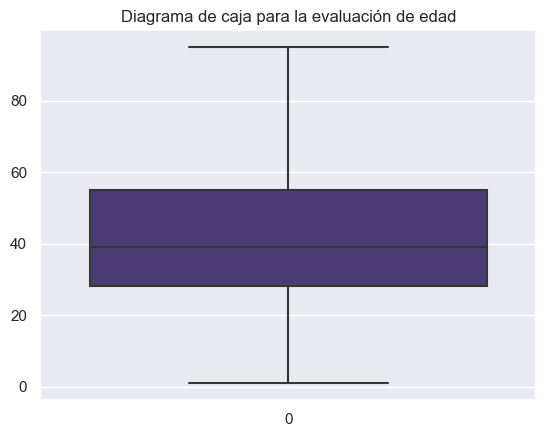

In [98]:
sns.boxplot(siniestros_viales_victimas.EDAD,  palette=sns.color_palette('viridis'))
plt.title('Diagrama de caja para la evaluación de edad')
plt.show()


En el siguiente código tratamos de hallar outlers, pero desde el boxplot no se ven outlers, de hecho dan una distribución sesgada a la izquierda, por lo tanto podríamo ver 

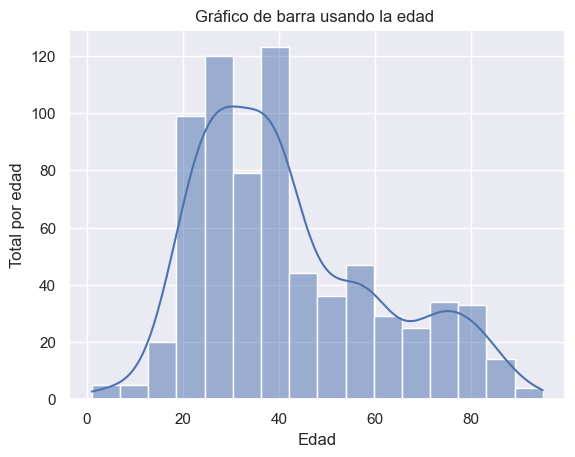

In [133]:
IQ1 = siniestros_viales_victimas.EDAD.quantile(0.25)
IQ3 = siniestros_viales_victimas.EDAD.quantile(0.75)

IQR = IQ3-IQ1
BI_Cal = (IQ1-1.5*IQR)
BS_Cal = (IQ3+1.5*IQR)
datos_edad = siniestros_viales_victimas.EDAD

sns.histplot(datos_edad[((datos_edad > BI_Cal) & (datos_edad < BS_Cal))], kde=True)
plt.title('Gráfico de barra usando la edad ')
plt.ylabel('Total por edad')
plt.xlabel('Edad')
plt.show()

In [77]:
VICTIMAS = siniestros_viales_victimas[['VICTIMA','EDAD']].groupby('VICTIMA')['EDAD'].mean().index
AVE_VIC = siniestros_viales_victimas[['VICTIMA','EDAD']].groupby('VICTIMA')['EDAD'].mean().values

color_palette = ['#440154', '#482878', '#3e4a89', '#31688e', '#26828e', '#1f9e89', 
                 '#35b779', '#6dcd59', '#b4de2c', '#fde725', '#ff7f00', '#ffa07a', 
                 '#6495ed', '#8a2be2', '#da70d6', '#20b2aa']

fig = go.Figure(data=[go.Bar(x=VICTIMAS,y=AVE_VIC, marker_color= color_palette)])
                        
fig.update_layout(title_text='Promedio de edad en víctimas por cada modalidad de transporte')
fig.show()

En esa sección tratamos de ver un "resúmen" de la información con distintas medidas de tendencia central y de distribución

In [78]:
print(datos_edad.describe(),'\nMediana: ' ,datos_edad.median())

count    664.000000
mean      42.167169
std       19.788034
min        1.000000
25%       27.000000
50%       37.000000
75%       56.250000
max       95.000000
Name: EDAD, dtype: float64 
Mediana:  37.0


Cambiamos nombres de columnas

In [79]:
siniestros_viales_victimas.rename(columns={'ID_hecho':'ID'}, inplace=True)

In [80]:
siniestros_viales_hechos.rename(columns={'pos x':'longitud','pos y':'latitud'}, inplace=True)

Eliminamos datos de las víctimas que ya están presentes en el dataset de HECHOS

In [81]:
siniestros_viales_victimas.drop(columns=['FECHA','AAAA','MM','DD'], inplace=True)

Unimos con sus respectiva relación que sería ID, ambas tablas (Hechos y Victimas)

In [82]:
data_siniestros = pd.merge(siniestros_viales_hechos, siniestros_viales_victimas,on='ID',how='inner')

In [83]:

color_palette = ['#440154', '#482878', '#3e4a89', '#31688e', '#26828e', '#1f9e89', '#35b779', '#6dcd59', '#b4de2c', '#fde725']

fig1 = go.Figure(data=[go.Bar(x=siniestros_viales_hechos['ACUSADO'].value_counts().values, y=siniestros_viales_hechos['ACUSADO'].value_counts().index, orientation='h', marker_color=color_palette)])
fig1.update_layout(title_text='Acusados de ocasionar el siniestro vial')
fig1.show()

Un gráfico el cual podemos apreciar el medio por el cual las victimas sufrieron accidentes 

In [84]:
fig1 = go.Figure(data=[go.Bar(x=siniestros_viales_hechos['VICTIMA'].value_counts().index, y=siniestros_viales_hechos['VICTIMA'].value_counts().values, marker_color=color_palette)])
fig1.update_layout(title_text='Víctimas reportadas en el siniestro vial')
fig1.show()

En este gráfico de línea tratamos de ver cómo se ha comportado el número de accidentes a lo largo de los años

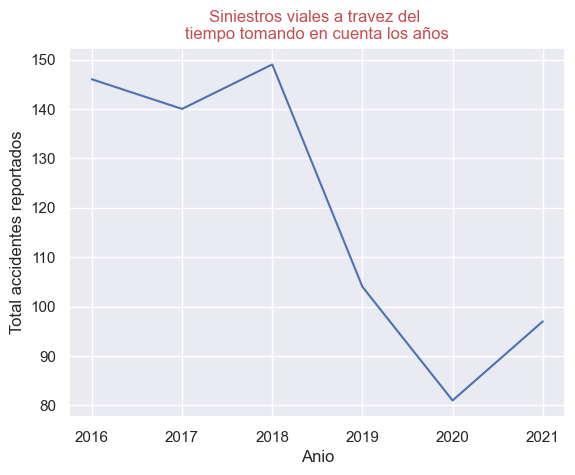

In [85]:
sns.lineplot(data_siniestros.sort_values(by='FECHA')['AAAA'].value_counts())
plt.title('Siniestros viales a travez del \ntiempo tomando en cuenta los años', color='r')
plt.xlabel('Anio')
plt.ylabel('Total accidentes reportados')
plt.show()

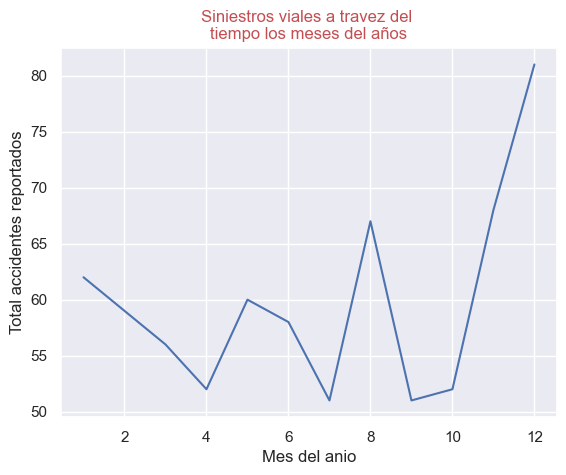

In [86]:
sns.lineplot(data_siniestros.sort_values(by='MM')['MM'].value_counts())
plt.title('Siniestros viales a travez del tiempo')
plt.title('Siniestros viales a travez del \ntiempo los meses del años', color='r')
plt.xlabel('Mes del anio')
plt.ylabel('Total accidentes reportados')
plt.show()

Breve histograma para evaluar los accidentes dados en determinadas horas del día

In [87]:
data_siniestros = data_siniestros[(data_siniestros['HORA'] !='SD') & (data_siniestros['HORA']!='SD')]

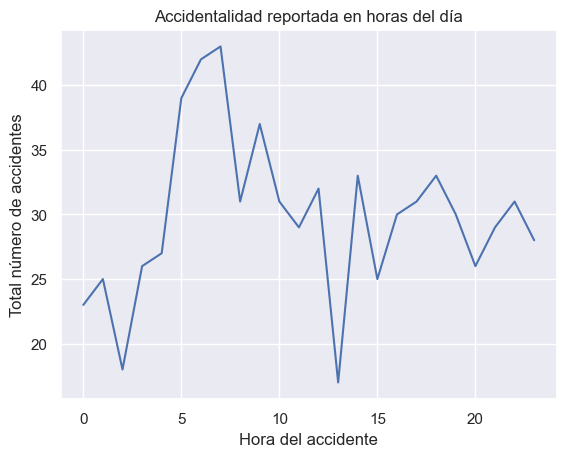

In [88]:
plt.plot(data_siniestros['HH'].sort_values().value_counts(sort=False).index,data_siniestros['HH'].sort_values().value_counts(sort=False).values)
plt.xlabel('Hora del accidente')
plt.ylabel('Total número de accidentes')
plt.title('Accidentalidad reportada en horas del día')
plt.show()

Gráfico circular para comparar las muertes por género de nacimiento

In [99]:
fig = exp.pie(data_siniestros['SEXO'], 
              names='SEXO', width=550,height=390, title='Víctimas divididas por género')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(margin=dict(l=10, r=0, b=50, t=50, pad=0))
fig.show()

In [90]:
def replace_nat_with_nan(value):
    if pd.isna(value) or isinstance(value, pd.Timestamp):
        return value
    else:
        return np.nan


Transformación de las fechas en un formato trabajable o que corresponda

In [91]:
data_siniestros.loc[:,'FECHA_FALLECIMIENTO'] = pd.to_datetime(data_siniestros['FECHA_FALLECIMIENTO'], errors='coerce')
data_siniestros.loc[:,'FECHA'] = pd.to_datetime(data_siniestros['FECHA'], errors='coerce')

En la siguiente línea tratamos de calcular el número de días que se necesitaron para que la persona falleciera, esto con el fin de ver cuán letal son ciertos lugares

In [92]:
data_siniestros.loc[:,'Estimado_dias_fallecimiento']= (pd.to_datetime(data_siniestros.loc[:,'FECHA_FALLECIMIENTO'])-pd.to_datetime(data_siniestros.loc[:,'FECHA'])).dt.days.copy()

Porcentaje de accidentes en donde la fatalidad se dió de inmediato al accidente por comuna (entiéndase letalidad por muertes instatáneas, es decir en el acto y no muertes dias después del suceso)

In [93]:
letalidad_por_comuna = ((data_siniestros[data_siniestros['Estimado_dias_fallecimiento']==0]
                         [['COMUNA','Estimado_dias_fallecimiento']].groupby('COMUNA').count().values.reshape(1,-1)[0])
                        * 100) / data_siniestros['COMUNA'].value_counts().sort_index()[1:].values

fig = exp.bar(x=[x for x in range(1, 16)], y=letalidad_por_comuna,
             labels={'x': 'Comuna', 'y': 'Letalidad (%)'},
             title='Letalidad por comuna',
             width=800, height=500)

fig.show()

In [94]:
def correct_inst(row):
    try:
        return float(row)
    
    except:
        return 0

In [95]:
data_siniestros['latitud'] = data_siniestros.loc[:,'latitud'].apply(correct_inst)
data_siniestros['longitud'] = data_siniestros.loc[:,'longitud'].apply(correct_inst)


In [96]:
accidentes_por_coordenada = data_siniestros[['latitud','longitud']].value_counts()

Gráfico interactivo en donde se muestra la ubicación y a su vez los lugares más frecuentes en accidentalidad

In [97]:

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format('Mapeo de accidentalidad')   

m = folium.Map(location=[-34.61315, -58.37723], zoom_start=12)

m.get_root().html.add_child(folium.Element(title_html))

contador = 0
accidentes_por_coordenada.values

for lon,lat in accidentes_por_coordenada.index:
    radius = 5 + int(accidentes_por_coordenada.values[contador])
    if int(accidentes_por_coordenada.values[contador]) >2:

        color = 'black'

    else:
        color = 'cornflowerblue'

    folium.CircleMarker(
        location=[lon, lat],
        radius=radius,
        color=color,
        stroke=False,
        fill=True,
        fill_opacity=0.6,
        opacity=1
    ).add_to(m)
    contador = contador+1

print("Los puntos negros son las ubicaciones con más accidentes, o con mayor frecuencia")   
m


Los puntos negros son las ubicaciones con más accidentes, o con mayor frecuencia


In [132]:
profilling = ydata_profiling.ProfileReport(siniestros_viales_hechos)
profilling.to_file(output_file='Hechos_Analysis.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 123.09it/s]


In [131]:
profilling = ydata_profiling.ProfileReport(siniestros_viales_victimas)
profilling.to_file(output_file='Victimas_Analysis.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 89.15it/s]
